In [ ]:
# Well first, let's nievely calculate for random entries

import numpy as np
import scipy.linalg as LA
import matplotlib.pyplot as plt

dets = []
n = 2
samples = 1000

for k in range(samples):
  A = np.random.randint(2, size=(n, n))

  dets.append(LA.det(A))

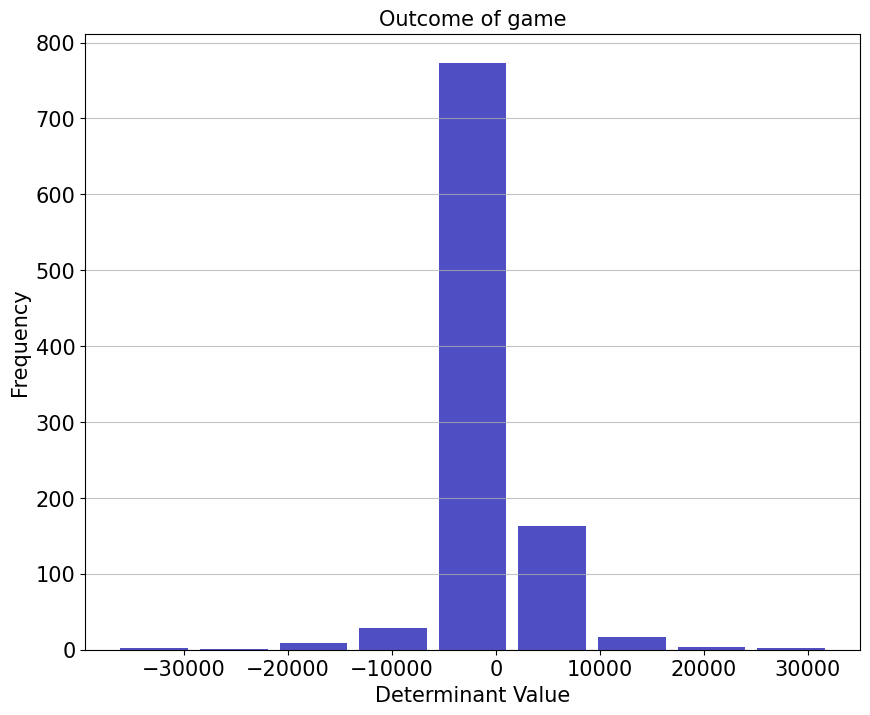

In [ ]:
# Ok we need to generate the matricies so that they have equal number of 0 and 1
# We have nxn numbers.
# Well it depends on whether n is odd or even
# Could have some counter
import math
import scipy.linalg as LA

def random_matrix(n):
  ones__avalible = 0
  zeros_avalible = 0
  if n % 2 == 0:
    ones__avalible = int(n*n/2)
    zeros_avalible = int(n*n/2)
  else:
    ones__avalible = math.ceil(n*n/2)
    zeros_avalible = math.floor(n*n/2)

  A = np.zeros((n,n))
  for i in range(n):
    for j in range(n):
      allowed = False
      while allowed == False:
        random_int = np.random.randint(2)
        if random_int == 1 and ones__avalible > 0:
          ones__avalible -= 1
          A[i][j] = random_int
          allowed = True
        elif random_int == 0 and zeros_avalible > 0:
          zeros_avalible -= 1
          A[i][j] = random_int
          allowed = True
  return A


def sample_game(n,samples):
  dets = np.zeros(samples)
  for k in range(samples):
    A = random_matrix(n)
    dets[k] = LA.det(A)
  return dets

dets = sample_game(20,1000)

plt.figure(figsize=[10,8])
n, bins, patches = plt.hist(x=dets, bins=9, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Determinant Value',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Outcome of game',fontsize=15)
plt.show()

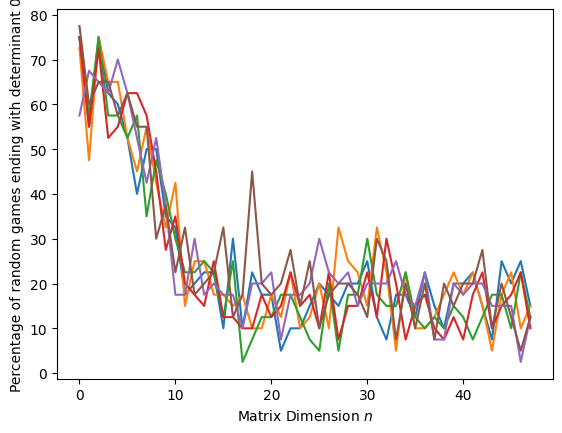

In [15]:
# Ok we need to generate the matricies so that they have equal number of 0 and 1
# We have nxn numbers.
# Well it depends on whether n is odd or even
# Could have some counter
import math
import scipy.linalg as LA
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

min = 2
max = 50

# creates a matrix that satisfies the rules of the game.
def random_matrix(n):
  ones__avalible = 0
  zeros_avalible = 0
  if n % 2 == 0:
    ones__avalible = int(n*n/2)
    zeros_avalible = int(n*n/2)
  else:
    ones__avalible = math.ceil(n*n/2)
    zeros_avalible = math.floor(n*n/2)

  A = np.zeros((n,n))
  for i in range(n):
    for j in range(n):
      allowed = False
      while allowed == False:
        random_int = np.random.randint(2)
        if random_int == 1 and ones__avalible > 0:
          ones__avalible -= 1
          A[i][j] = random_int
          allowed = True
        elif random_int == 0 and zeros_avalible > 0:
          zeros_avalible -= 1
          A[i][j] = random_int
          allowed = True
  return A

# this creates lots of sample games and puts the determinants in an array
def sample_game(n,samples):
  dets = np.zeros(samples)
  for k in range(samples):
    A = random_matrix(n)
    dets[k] = LA.det(A)
  return dets

# this calculates the percentage of games with determinant 0
def stats(dets):
  count = 0
  for k in range(len(dets)):
    if dets[k] == 0:
      count += 1
  return count/len(dets)*100

# this creates the simulation, putting it all together
def run_simulation():
  samples = 40
  percentage_win = []
  for n in range(min,max):
    #percentage_win.append([n,stats(sample_game(n,samples))])
    percentage_win.append(stats(sample_game(n,samples)))
  return percentage_win


plt.plot(run_simulation())
plt.plot(run_simulation())
plt.plot(run_simulation())
plt.plot(run_simulation())
plt.plot(run_simulation())
plt.plot(run_simulation())
plt.ylabel("Percentage of random games ending with determinant 0")
plt.xlabel("Matrix Dimension $n$")
plt.show()

In [19]:
# code to play the game for nxn matrix. Can make player B place random entries and you get to pick as player 1
import scipy.linalg as LA
import numpy as np

# If the matrix is completely full, the game should end
def check_done(matrix):
  for i in range(n):
    for j in range(n):
      if matrix[i][j] == -1:
        return False
  return True

# This calculates the determinant to find out who won.
def who_won(matrix):
  det = LA.det(matrix)
  print("Determinant is "+str(det))
  if det == 0:
    print('Player A won')
  else:
    print('Player B won')


# print the numpy matrix in a nice readable format. (The blank spaces are stored as -1 and we convert them there)
def print_matrix(matrix):
  print_matrix = np.where(matrix == -1, '_', matrix)
  print("\nCurrent matrix is as follows:")
  print(print_matrix)

# This is the game function that we call for each players turn
def game(myturn):
  global matrix
  global end
  # This is the user's turn
  if myturn == 1 and end == False:

    # get what position the user wants to play
    x = int(input('row coordinate ')) - 1
    y = int(input('column coordinate ')) - 1

    # boolian variable to check if move is in the correct range and not filled already
    valid = 0<=x<n and 0<=y<n and matrix[x][y]==-1

    # based on whether the input is valid or not
    if valid == True:
      # place the number there
      matrix[x][y] = 0
      print_matrix(matrix)
    else:
      print("Wrong input. Try again.")
      game(1)
    # if the matrix is full, calculate who won
    if check_done(matrix) == True:
      who_won(matrix)
      end = True
      return
    # call the other players turn
    game(0)
  elif myturn == 0 and end == False:
    # computer's go
    random_x = np.random.randint(0,n)
    random_y = np.random.randint(0,n)

    # checking that the new position isn't already filled in
    valid = matrix[random_x][random_y]==-1

    if valid == True:
      matrix[random_x][random_y] = 1
      print_matrix(matrix)
      if check_done(matrix) == True:
        who_won(matrix)
        end = True
        return
    elif valid == False and check_done(matrix) == False:
      game(0)
    # calling the other players turn
    game(1)

end = False
last_move = [0,0]
n = int(input("Input matrix size: "))
matrix = np.full((n,n),-1)
print_matrix(matrix)
game(1)

Input matrix size: 4

Current matrix is as follows:
[['_' '_' '_' '_']
 ['_' '_' '_' '_']
 ['_' '_' '_' '_']
 ['_' '_' '_' '_']]
row coordinate 3
column coordinate 3

Current matrix is as follows:
[['_' '_' '_' '_']
 ['_' '_' '_' '_']
 ['_' '_' '0' '_']
 ['_' '_' '_' '_']]

Current matrix is as follows:
[['_' '_' '_' '_']
 ['_' '_' '_' '1']
 ['_' '_' '0' '_']
 ['_' '_' '_' '_']]
row coordinate 3
column coordinate 4

Current matrix is as follows:
[['_' '_' '_' '_']
 ['_' '_' '_' '1']
 ['_' '_' '0' '0']
 ['_' '_' '_' '_']]

Current matrix is as follows:
[['_' '1' '_' '_']
 ['_' '_' '_' '1']
 ['_' '_' '0' '0']
 ['_' '_' '_' '_']]
row coordinate 4
column coordinate 2

Current matrix is as follows:
[['_' '1' '_' '_']
 ['_' '_' '_' '1']
 ['_' '_' '0' '0']
 ['_' '0' '_' '_']]

Current matrix is as follows:
[['_' '1' '_' '_']
 ['_' '_' '_' '1']
 ['_' '_' '0' '0']
 ['_' '0' '_' '1']]
row coordinate 4
column coordinate 3

Current matrix is as follows:
[['_' '1' '_' '_']
 ['_' '_' '_' '1']
 ['_' 

## Winning Strategy

We now have a playable game, but what is the winning strategy? After some thinking, if we can add enough rows together together to get a zero row, then the determinant is automatically zero (recalling basic facts from linear algebra). So if we get enough rows that add to at least a pair of 1-rows $(1,...,1)$, then we can subtract one 1-row from the other, yielding a zero row and which automatically gives determinant zero.

How could you achieve this? Simplifying to the case where $n\geq4$ is even and the person placing down zeros goes second, we could do the following

In [ ]:
# Winning strategy:

# if n is even and n>=4 and 0 goes second, then draw a line of symmetry that splits the matrix into an upper half and lower half.

# [        ] - row 1
# [        ] - row 2
# ---------- - line of symmetry
# [        ] - row 3
# [        ] - row 4

# and play opposite to what the player has just done

# [1       ] - row 1
# [        ] - row 2
# ---------- - line of symmetry
# [        ] - row 3
# [        ] - row 4

# so play the opposte move

# [1       ] - row 1
# [        ] - row 2
# ---------- - line of symmetry
# [        ] - row 3
# [0       ] - row 4

# and keep this going, playing the opposite move

# [1 0     ] - row 1
# [     0  ] - row 2
# ---------- - line of symmetry
# [     1  ] - row 3
# [0 1     ] - row 4

# untill

# [1  0  1  1] - row 1
# [0  1  0  1] - row 2
# ----------- - line of symmetry
# [1  0  1  0] - row 3
# [0  1  0  0] - row 4

# and now we can add the 4st row to the 4th row and 3rd row to the second row without changing the determinant

# [1  1  1  1] - row 1
# [1  1  1  1] - row 2
# ----------- - line of symmetry
# [1  0  1  0] - row 3
# [0  1  0  0] - row 4

# and subtracting row 2 from row 1 yields

# [0  0  0  0] - row 1
# [1  1  1  1] - row 2
# ----------- - line of symmetry
# [1  0  1  0] - row 3
# [0  1  0  0] - row 4

# which obviously has determinant zero and 0 wins the game!

## The Strategy
For even $n\geq4$
- 1 goes second
  - layer B places a 1 in entry $(i,j)$.
  - Player A places a 0 in entry $(n-i+1,j)$.
  - Repeat steps (2) and (3) until the matrix is full.

- 1 goes first
  - Player A places a 0 in a random entry $(i_0,j_0)$.
  - Player B places a 1 in a different entry $(i,j)$.
  - Player B places a 0 in entry $(n-i+1,j)$ as above.
  - Repeat the previous steps (2) and (3) until player B places a 1 in entry $(n-i_0+1,j_0)$, completing that set of 0-1 pairs.
  - Repeat point 1 and continue until the matrix is full.

For odd $n\geq4$
- If 1 goes first
  - Player B places a 1 in entry $(i,j)$
  - if $(i,j)=(\frac{n+1}{2},\frac{n+1}{2})$ (the middle entry), then Player A places a 0 in a valid space on a row with $i\neq\frac{n+1}{2}$.
  - if $i = \frac{n+1}{2}$, but j is not the middle column, then player A places a 0 in position $(i,n-j+1)$.
  - if $i\neq\frac{n+1}{2}$, then player A places a 0 in entry $(n-i+1,j)$.
  - Repeat until the matrix is full.

- If 0 goes first

 - Player A places a 0 in an entry $(\frac{n+1}{2},\frac{n+1}{2})$
  - Player B places a 1 in entry $(i,j)$.

   - if $i = \frac{n+1}{2}$, then player A places a 0 in position $(i,n-j+1)$.
   - if $i\neq\frac{n+1}{2}$, then player A places a 0 in entry $(n-i+1,j)$.
   - Repeat until the matrix is full.

Can just implement this strategy in python now

In [17]:
# I've run out of time to implement this correctly but it is possible to define a
# strategy function based on my pdf submission document.
# meaning when you play n>=4, the human player will always lose against the perfect
# strategy of the computer.
'''
import scipy.linalg as LA
import numpy as np

def strat(matrix,start,hold):
  # break this down depending on cases and the last move

  # even n and player A goes second
  if n % 2 and start == 1:
    x = n-hold[0]
    y = hold[1]


  # even n and player

  return x,y


def strat_game(myturn):
  global matrix
  global end
  global hold
  if myturn == 1 and end == False:
    x = int(input('row coordinate ')) - 1
    y = int(input('column coordinate ')) - 1

    valid = 0<=x<n and 0<=y<n and matrix[x][y]==-1

    if valid == True:
      matrix[x][y] = 0
      hold = [x,y]
      print_matrix(matrix)
    else:
      print("Wrong input. Try again.")
      strat_game(1)
    if check_done(matrix) == True:
      who_won(matrix)
      end = True
      return
    strat_game(0)
  elif myturn == 0 and end == False:
    # computer's go
    x = strat(matrix,start,hold)[0]
    y = strat(matrix,start,hold)[1]
    print(x,y)

    valid = matrix[x][y]==-1

    if valid == True:
      matrix[x][y] = 1
      print_matrix(matrix)
      if check_done(matrix) == True:
        who_won(matrix)
        end = True
        return
    elif valid == False and check_done(matrix) == False:
      strat_game(0)
    strat_game(1)

end = False
hold = [0,0]
n = int(input("Input matrix size: "))
start = int(input("Who goes first? (0 or 1) "))
matrix = np.full((n,n),-1)
print_matrix(matrix)
strat_game(start)
'''

Input matrix size: 4
Who goes first? (0 or 1) 1

Current matrix is as follows:
[['_' '_' '_' '_']
 ['_' '_' '_' '_']
 ['_' '_' '_' '_']
 ['_' '_' '_' '_']]
row coordinate 1
column coordinate 1

Current matrix is as follows:
[['0' '_' '_' '_']
 ['_' '_' '_' '_']
 ['_' '_' '_' '_']
 ['_' '_' '_' '_']]


UnboundLocalError: local variable 'x' referenced before assignment